# Building a Regression MLP using the Sequential API
Dataset: California housing problem

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

### Separate test, train and validation set.

In [2]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

### Scaling the features.

In [3]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

## Build, train and evaluate the model

In [4]:
import tensorflow as tf
from tensorflow import keras
print(keras.__version__)
print(tf.__version__)

2.2.4-tf
2.0.0


In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.relu, input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

In [9]:
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD())

In [10]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.3793 - val_loss: 2.4140
Epoch 2/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3770 - val_loss: 2.6657
Epoch 3/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3728 - val_loss: 2.7774
Epoch 4/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3728 - val_loss: 2.9901
Epoch 5/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3715 - val_loss: 3.1125
Epoch 6/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3678 - val_loss: 3.3514
Epoch 7/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3681 - val_loss: 3.4116
Epoch 8/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3672 - val_loss: 3.5601
Epoch 9/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3671 - val_l

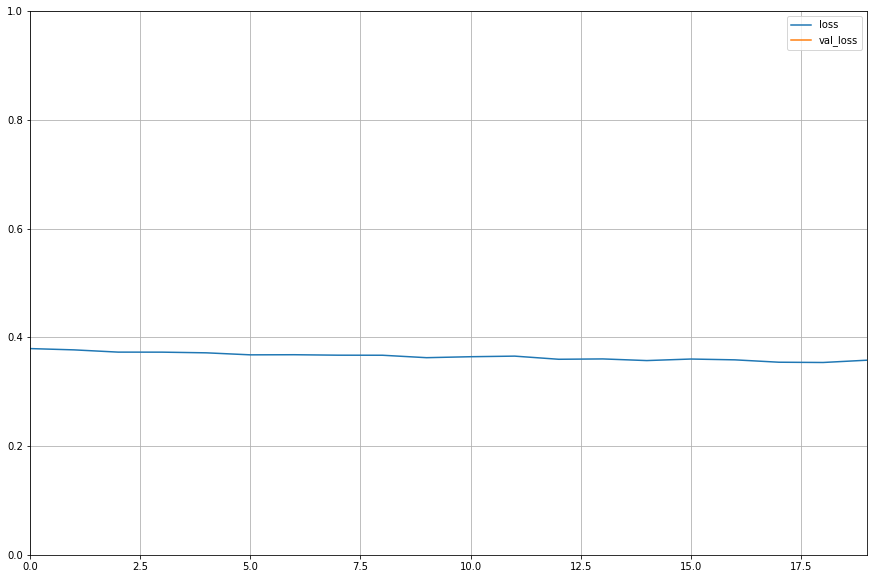

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(15,10))
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [ ]:
mse_test = model.evaluate(x_test, y_test)

In [16]:
mse_test

0.6637666947157808

In [17]:
x_new = x_test[:3]
y_pred = model.predict(x_new)